# **OBJECTIVE:**
# **Perform a Geographical Analysis of the restaurants in the dataset.**

In [32]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
data = pd.read_csv("/content/Cognifyz Technologies.csv")
data.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


In [34]:
df = data.copy()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [36]:
df.shape

(9551, 21)

In [37]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [38]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [39]:
df.isnull().sum() # Cuisine have 9 missing values

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


/tmp/ipython-input-40-2419773604.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = missing.index, y = missing.values, palette="Reds_r")


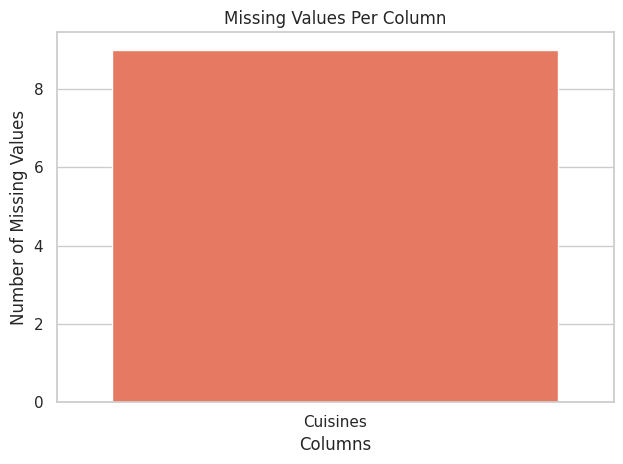

In [40]:
missing = df.isnull().sum()
missing = missing[missing>0]
sns.barplot(x = missing.index, y = missing.values, palette="Reds_r")
plt.title("Missing Values Per Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [41]:
df.duplicated().sum()

np.int64(0)

# **Business Objectives**

# **1. Explore the latitude and longitude coordinates of the restaurants and visualize their distribution on a map.**

**Latitude:**

- Measures North-South position.

- Lines run horizontally, parallel to the Equator.

- It tells you how far North or South you are from the Equator.

**Longitude:**

- Measures East-West position.

- Lines run vertically, converging at the poles.

- It tells you how far east or west you are from the Prime Meridian.

In [42]:
print(df[['Latitude', 'Longitude']].head())

    Latitude   Longitude
0  14.565443  121.027535
1  14.553708  121.014101
2  14.581404  121.056831
3  14.585318  121.056475
4  14.584450  121.057508


- These are the Cordinates of (Latitude , Longitude)

In [43]:
print(df[['Latitude', 'Longitude']].isnull().sum())

Latitude     0
Longitude    0
dtype: int64


- There is no Null value present in both Columns

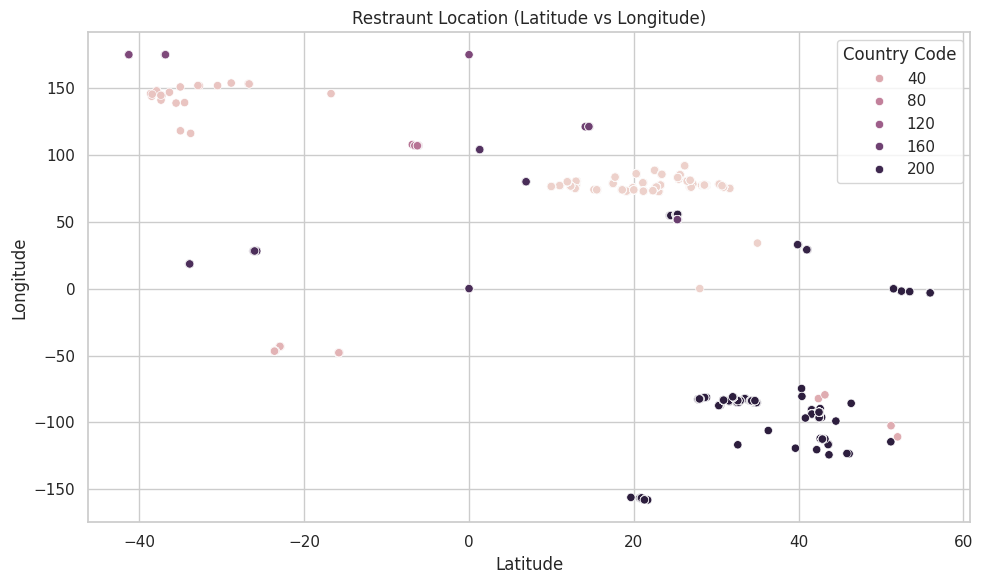

In [44]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "Latitude", y = "Longitude", hue = "Country Code", data = df)
plt.title("Restraunt Location (Latitude vs Longitude)")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.tight_layout()
plt.show()

# **Observations:**
**1. Geographic Clustering:**
- There are 3–4 major clusters of restaurants around certain lat-long combinations.
- One prominent cluster is in the positive latitude & positive longitude zone — likely representing South-East Asia or India.
- Another dense cluster in the positive latitude & negative longitude region — potentially the Americas.
- A smaller group around negative latitudes and positive longitudes — might represent Southern Hemisphere regions (e.g., Australia).

**2. Diverse Country Codes:** Different Country Codes (40 to 200) are represented.
- The lighter pink (lower codes like 40, 80) are more evenly spread across the map.

- Darker dots (higher codes like 160, 200) are more concentrated in specific zones — may indicate operational hubs or more saturated markets.

**3. Latitude vs Longitude Patterns:** Many points fall within

- Latitude: 10° to 50°
- Longitude: 50° to 150°
- Suggests majority of restaurant locations are in the Northern Hemisphere and Eastern Hemisphere, possibly in Asia.

**4. Sparse Regions:** Very few restaurants are located in-

- Extreme negative longitudes (e.g., -150)
- High northern latitudes (e.g., 60+)
- This could be due to low population, less market penetration, or harsh climates (e.g., polar areas).



# **2. Group the restaurants by city or locality and analyze the concentration of restaurants in different areas.**

In [45]:
restaurant_counts = df.groupby('City').size().reset_index(name='Restaurant_Count')
restaurant_counts = restaurant_counts.sort_values(by='Restaurant_Count', ascending=False)
pd.set_option('display.max_rows', None)
print(restaurant_counts)

                       City  Restaurant_Count
88                New Delhi              5473
50                  Gurgaon              1118
89                    Noida              1080
43                Faridabad               251
48                Ghaziabad                25
17             Bhubaneshwar                21
69                  Lucknow                21
51                 Guwahati                21
2                 Ahmedabad                21
5                  Amritsar                21
0                 Abu Dhabi                20
3                    Albany                20
1                      Agra                20
115                Savannah                20
120                   Surat                20
10                  Augusta                20
11               Aurangabad                20
9                  Auckland                20
8                    Athens                20
6                    Ankara                20
4                 Allahabad       

/tmp/ipython-input-46-2249090724.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=restaurant_counts.head(15), x='Restaurant_Count', y='City', palette='viridis')


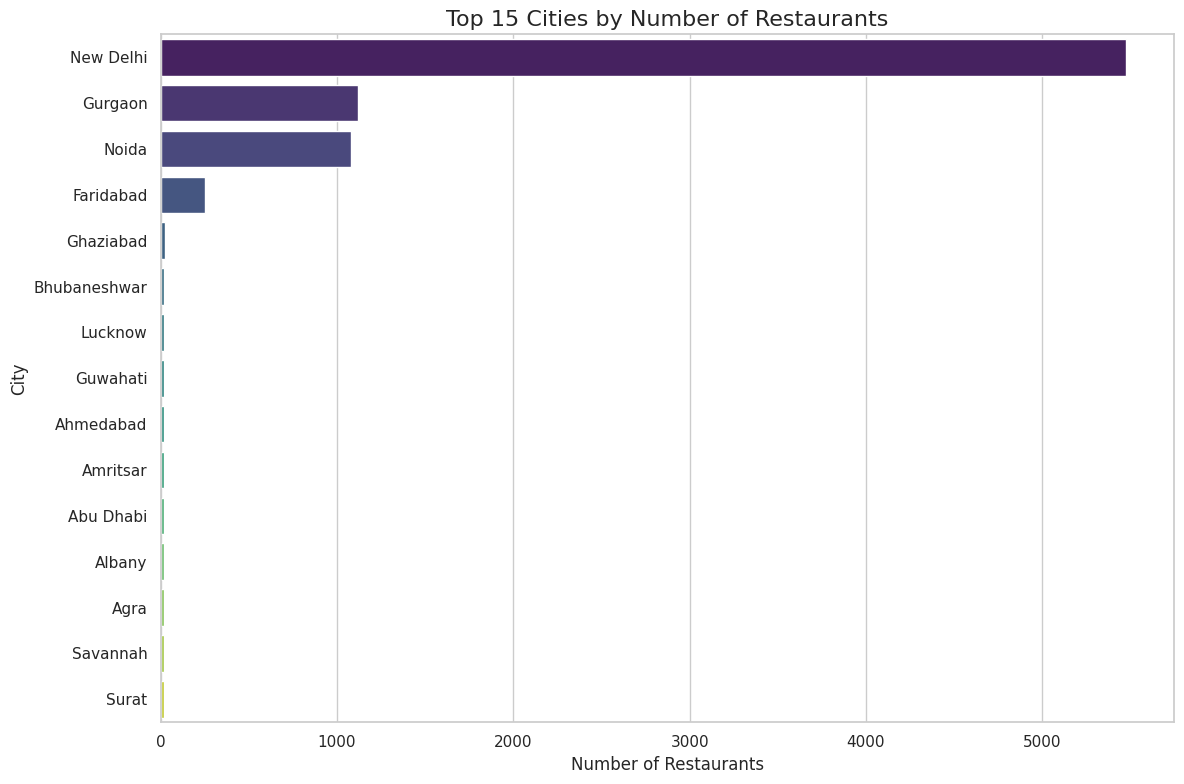

In [46]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Bar plot
sns.barplot(data=restaurant_counts.head(15), x='Restaurant_Count', y='City', palette='viridis')

# Add labels
plt.title("Top 15 Cities by Number of Restaurants", fontsize=16)
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.tight_layout()

# Show plot
plt.show()

In [47]:
# Group by the number of restaurants and count how many cities have that number
grouped_by_count = restaurant_counts.groupby('Restaurant_Count').size().reset_index(name='Number_of_Cities')

# Sort by Restaurant_Count
grouped_by_count = grouped_by_count.sort_values(by='Restaurant_Count')

# Display result
print(grouped_by_count)


    Restaurant_Count  Number_of_Cities
0                  1                46
1                  2                 8
2                  3                 2
3                  4                 2
4                  6                 1
5                 11                 1
6                 14                 1
7                 16                 1
8                 18                 2
9                 20                67
10                21                 5
11                25                 1
12               251                 1
13              1080                 1
14              1118                 1
15              5473                 1


# **Observations:**
- The Highest number of Restaurants is present in New Delhi (5473)
- There are 21 Restaurants present in 5 Cities each.
- There are 20 Restaurants present in 67 Cities each.
- There are 2 Restaurants present in 8 Cities each.
- There is only 1 Restaurant present in 46 Cities each.
- New Delhi, Gurgaon, Noida, Faridabad, Ghaziabad have maximum number of Restraunts majorly.


# **Locality Analysis**

In [48]:
locality_counts = df.groupby('Locality').size().reset_index(name='Restaurant_Count').sort_values(by='Restaurant_Count', ascending=False).head(50)


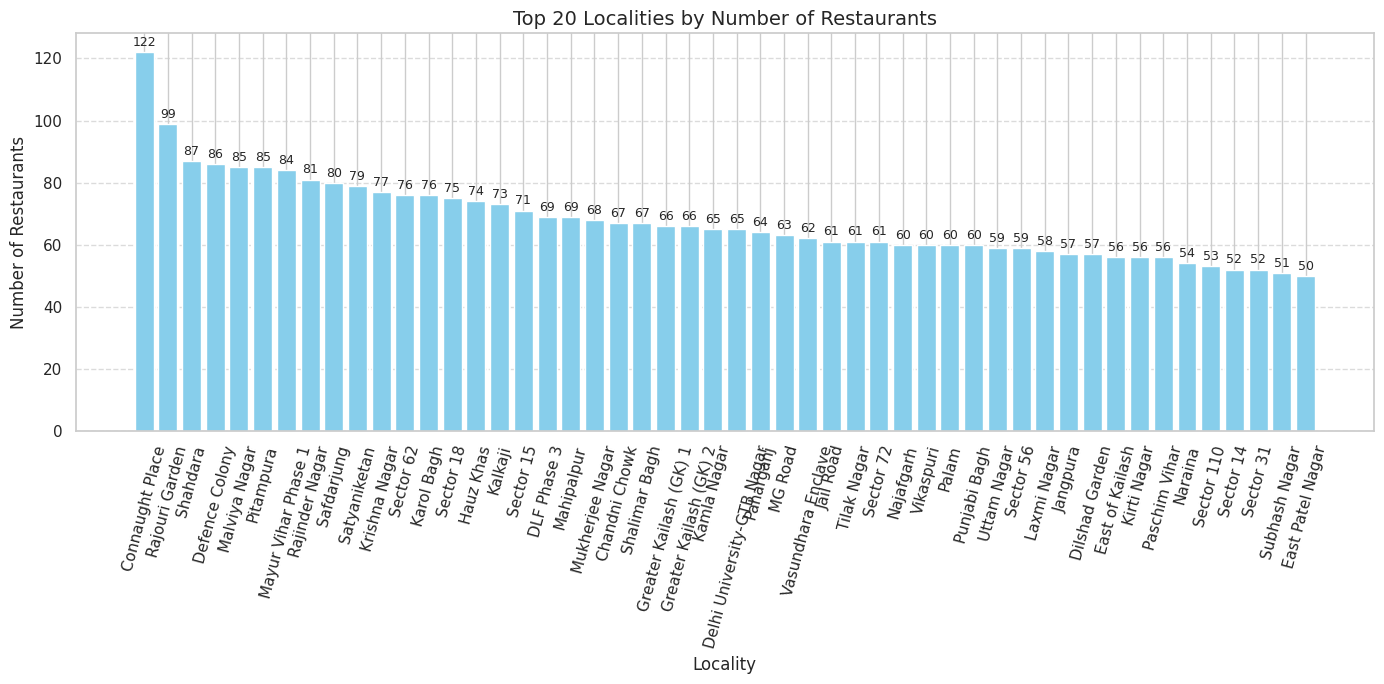

In [49]:
plt.figure(figsize=(14, 7))
bars = plt.bar(locality_counts['Locality'], locality_counts['Restaurant_Count'], color='skyblue')

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=9)

# Customize plot
plt.title("Top 20 Localities by Number of Restaurants", fontsize=14)
plt.xlabel("Locality", fontsize=12)
plt.ylabel("Number of Restaurants", fontsize=12)
plt.xticks(rotation=75)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# **Observations:**
**1. Connaught Place leads by a large margin:**
- With 122 restaurants, Connaught Place stands out as the most saturated locality for food businesses.
- It has significantly more restaurants than the second-highest (Rajouri Garden – 99), indicating it may be a prime commercial and culinary hub.

**2. High-density clusters:**
- Other top contributors include Rajouri Garden (99), Shahdara (87), and Defence Colony (86).
- These areas may represent emerging or well-established food streets or zones.

**3. Central and upscale localities dominate:**
- Localities like Malviya Nagar, Mayur Vihar, Safdarjung, Hauz Khas, Kailash Colony, etc., are affluent areas—indicating a correlation between socio-economic class and restaurant concentration.

**4. Competitive zones:**

- Localities with restaurant counts between 60 and 80 form a high-competition belt—great for marketing strategies but tough for new entries.

**5. Residential Areas:**
- Places like Tilak Nagar, Subhash Nagar, and Paschim Vihar show considerable restaurant presence, suggesting a strong demand for casual dining in residential zones.

**6. Distribution insight:**
- The restaurant ecosystem is not evenly distributed—with a sharp drop in numbers after the top 20–30 localities.

**7. Urban Planning Use:**
- Urban developers or food delivery businesses (like Zomato/Swiggy) can use this to optimize service, logistics, and campaigns in high-density areas.

# **3. Calculate statistics such as the average ratings,cuisines, or price ranges by city or locality.**

In [50]:
# Average Rating by City
average_rating_by_city = round(df.groupby("City")["Aggregate rating"].mean(),3).sort_values(ascending=False).reset_index()
average_rating_by_city.rename(columns ={"Aggregate rating":"Average Ratings"})
print(average_rating_by_city)

                       City  Aggregate rating
0                Inner City             4.900
1               Quezon City             4.800
2               Makati City             4.650
3                Pasig City             4.633
4          Mandaluyong City             4.625
5                Beechworth             4.600
6                    London             4.535
7               Taguig City             4.525
8              Secunderabad             4.500
9                   Lincoln             4.500
10            Tagaytay City             4.500
11                  Orlando             4.475
12                Tampa Bay             4.410
13           Rest of Hawaii             4.410
14                Palm Cove             4.400
15                  Tanunda             4.400
16                Bangalore             4.375
17                    Dubai             4.370
18               Pasay City             4.367
19                  Jakarta             4.356
20                Hyderabad       

# **Observations:**
- The Average Ratings have range from 1.867 to 4.90
- Restraunts which are present in Inner City (USA) have the Highest Average Ratings of 4.90 which means the owner is giving  premium quality of food, cleaniness in Restraunt and excellent hospitality to customers.
-  Restraunts which are present in Faridabad have the Lowest Average Ratings of 1.867 which means they are not maintaining the standards.
- New Delhi, Faridabad, Gurgaon, Noida have maximum number of Restraunts but their Average Ratings are minimum means they are just more in numbers but with pethatic food quality, and not maintaining standards.      

In [51]:
#Average Ratings by Locality
average_ratings_by_locality = round(df.groupby("Locality")["Aggregate rating"].mean(),3).sort_values(ascending=False).reset_index()
average_ratings_by_locality.rename(columns ={"Aggregate rating":"Average Ratings"})
print(average_ratings_by_locality)

                                               Locality  Aggregate rating
0                                             West Park             4.900
1                                              Aminabad             4.900
2                           Venetian Village, Al Maqtaa             4.900
3           Sofitel Philippine Plaza Manila, Pasay City             4.900
4                        Setor De Clubes Esportivos Sul             4.900
5                        Taman Impian Jaya Ancol, Ancol             4.900
6                                     The Milk District             4.900
7                                                  Paia             4.900
8                              Old Dutch Hospital, Fort             4.900
9                                           Pondok Aren             4.900
10                                                Bebek             4.900
11                                    Beak Street, Soho             4.900
12                                Barw

# **Observations:**
- The range of Average Rating as per Locality is from 0 to 4.9
- Most of the Restraunts situated in USA Locality have the highest Ratings of 4.90
- Most of the Restraunts situated in India have Lowest Rating of 0.00
- The Restraunts situated in Overseas have very good Ratings as they are providing good quality of food, cleaniness, Infrastructure of restraunt and good hospitality to the customers unlike in India.       

In [52]:
# Prices by City
price_by_city = round(df.groupby("City")["Price range"].mean(),3).sort_values(ascending=False).reset_index()
price_by_city.rename(columns ={"Price range":"Price Range"})
print(price_by_city)

                       City  Price range
0                 Panchkula        4.000
1          Vineland Station        4.000
2               Paynesville        4.000
3              Johannesburg        4.000
4                Inner City        4.000
5                Pasay City        4.000
6                 Princeton        4.000
7                   Sandton        3.818
8          Mandaluyong City        3.750
9                  Pretoria        3.700
10                Singapore        3.650
11                     Doha        3.650
12                      Goa        3.650
13               S��o Paulo        3.600
14              Taguig City        3.500
15           Rio de Janeiro        3.500
16                  Sharjah        3.300
17                Abu Dhabi        3.300
18          Wellington City        3.250
19                Cape Town        3.200
20                Bras�_lia        3.100
21                    Dubai        3.050
22                 Dehradun        3.050
23              

# **Observation:**
- The Restraunts situated in different Cities have Price Range from ₹1000 to ₹4000
- The Restraunts in the Cities like Panchkula, Vineland Station,Paynesville, Johannesburg, Inner City, Pasay City, Princeton, Sandton have Average Price bill of ₹4000.
- The Restraunts in the Cities like Clatskanie,  Lakes Entrance, Lakeview, Inverloch, Fernley, Dicky, Miller, Mc Millan,Vernonia have Average Price bill of ₹1000.


In [53]:
# Prices by Locality
price_by_locality = round(df.groupby("Locality")["Price range"].mean(),3).sort_values(ascending=False).reset_index()
price_by_locality.rename(columns ={"Price range":"Price Range"})
print(price_by_locality)

                                               Locality  Price range
0       Abu Dhabi Mall, Tourist Club Area  (Al Zahiyah)        4.000
1                 World Trade Center Mall, Al Markaziya        4.000
2                              Taj Vivanta, Khan Market        4.000
3                                              Lago Sul        4.000
4                                           Kuru�_e��me        4.000
5                             Albemarle Street, Mayfair        4.000
6                               Al Wahda Mall, Al Wahda        4.000
7                                     Al Qasba, Al Khan        4.000
8                                               Al Nasr        4.000
9                                              Al Hilal        4.000
10                       Kasbah, Greater Kailash (GK) 1        4.000
11                                    Jewellery Quarter        4.000
12                     Jaypee Siddharth, Rajendra Place        4.000
13                                

# **Observation:**
- The Restaurants situated on different Localities have a Price Range of ₹1000 to ₹4000

In [54]:
# Cuisines by Price
cuisines_by_price = round(df.groupby("Cuisines")["Price range"].mean(), 3).sort_values(ascending = False).reset_index()
print(cuisines_by_price)

                                               Cuisines  Price range
0                                               African        4.000
1                                   African, Portuguese        4.000
2       Thai, Japanese, Chinese, Indonesian, Vietnamese        4.000
3              European, Chinese, North Indian, Italian        4.000
4                                European, Contemporary        4.000
5                   European, Continental, North Indian        4.000
6                                     European, Italian        4.000
7                                Steak, Tapas, Bar Food        4.000
8                        American, Continental, Italian        4.000
9                American, Continental, Italian, Bakery        4.000
10                     European, Italian, Mediterranean        4.000
11                      European, Italian, North Indian        4.000
12                    European, Lebanese, Mediterranean        4.000
13             Continental, Thai, 

# **Observation:**
- The Price Range of different Cuisines in different Cities and Localities is from ₹1000 to ₹4000.


In [55]:
# Cuisines by Average Ratings
cuisines_by_ratings = round(df.groupby("Cuisines")["Aggregate rating"].mean(), 3).sort_values(ascending = False).reset_index()
print(cuisines_by_ratings)

                                               Cuisines  Aggregate rating
0                               Burger, Bar Food, Steak             4.900
1                               American, Burger, Grill             4.900
2                          American, Caribbean, Seafood             4.900
3                              American, Coffee and Tea             4.900
4                       Mexican, American, Healthy Food             4.900
5                          Italian, Bakery, Continental             4.900
6                              BBQ, Breakfast, Southern             4.900
7                                      European, German             4.900
8                                     Hawaiian, Seafood             4.900
9                                     Sunda, Indonesian             4.900
10                              American, BBQ, Sandwich             4.900
11                                        World Cuisine             4.900
12                                  Co

# **Observation:**
- The Average Ratings of different Cuisines ranges from 0.00 to 4.90.
- The favourite Cuisine for most of the customers is fast food with 4.90 rating   
- Most of the Cuisines have 0 rating indicates that they either didn't enjoy the food or they skipped by giving the ratings.  